In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline
# Dependencies and Setup.
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# File to load.
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [27]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()
city_data_df.notnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Rural")

18

In [9]:
# From ride_data_df Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [21]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [26]:
ride_data_df["fare"].astype(float)

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 2375, dtype: float64

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [14]:
len(pyber_data_df["city"].unique())

120

In [29]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [16]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [17]:
# Create the Suburban city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [18]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [34]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [35]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [37]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [38]:
urban_driver_count["Rodneyfort"]

34

In [40]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

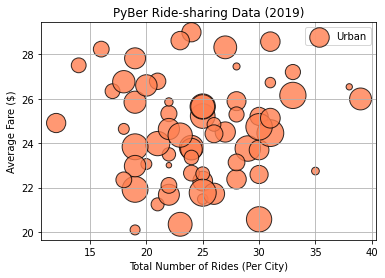

In [45]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral', edgecolor='k', linewidths=1,
           alpha=0.8, label='Urban')
plt.title("PyBer Ride-sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

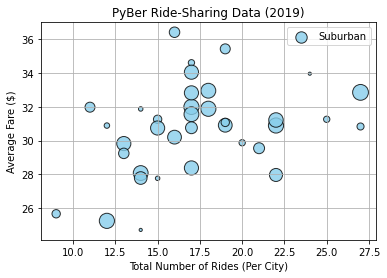

In [46]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

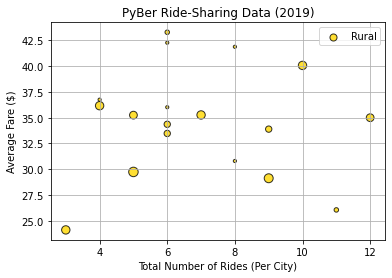

In [47]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

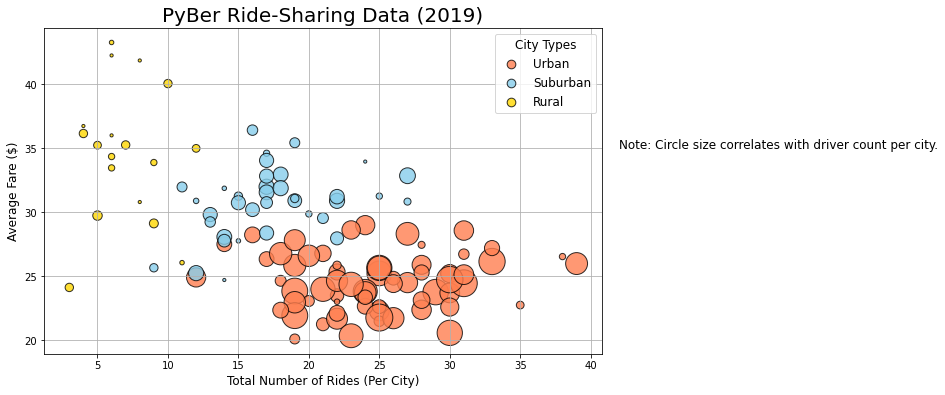

In [53]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c='coral', edgecolor='k', linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate other graph properties.
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a Legend.
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)   
                  
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.jpg")
                  
# Show the plot
plt.show()

In [59]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [57]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [56]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [60]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [61]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [62]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [66]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [67]:
# Median
urban_ride_count.median()

24.0

In [68]:
# Mode
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [69]:
suburban_ride_count.mode()

0    17
dtype: int64

In [70]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [72]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [73]:
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")


The median for the ride counts for urban trips is 17.0.


In [74]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [77]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")


The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [78]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")


The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [81]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [83]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [176]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
        ...  
2245    13.92
2246    12.76
2247    27.70
2248    47.41
2249    17.97
Name: fare, Length: 625, dtype: float64

In [177]:
rural_fares = rural_cities_df["fare"]
rural_fares

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

In [86]:
mean_suburban_fares = np.mean(suburban_fares)
mean_suburban_fares

30.97012800000002

In [90]:
mean_rural_fares = np.mean(rural_fares)
mean_rural_fares

34.623440000000016

In [99]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [101]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [102]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [107]:
# Calculate mean of each type of drivers.
average_urban_drivers = np.mean(urban_drivers)
average_suburban_drivers = np.mean(suburban_drivers)
average_rural_drivers = np.mean(rural_drivers)
print(f"Urban average: {average_urban_drivers:.2f}, Suburban Average: {average_suburban_drivers:.2f}, Rural Average: {average_rural_drivers:.2f}")

Urban average: 36.68, Suburban Average: 13.71, Rural Average: 4.30


In [108]:
# Calculate median of each type of drivers.
median_urban_drivers = np.median(urban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
median_rural_drivers = np.median(rural_drivers)
print(f"Urban median: {median_urban_drivers:.2f}, Suburban median: {median_suburban_drivers:.2f}, Rural median: {median_rural_drivers:.2f}")

Urban median: 37.00, Suburban median: 16.00, Rural median: 4.00


In [112]:
# Calculate mode of each type of drivers.
mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f"Urban mode: {mode_urban_drivers}, Suburban mode: {mode_suburban_drivers}, Rural mode: {mode_rural_drivers}")

Urban mode: ModeResult(mode=array([39], dtype=int64), count=array([86])), Suburban mode: ModeResult(mode=array([20], dtype=int64), count=array([79])), Rural mode: ModeResult(mode=array([1], dtype=int64), count=array([32]))


In [115]:
# Get Urban summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

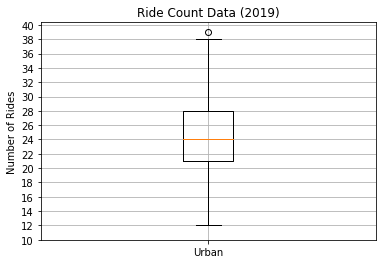

In [122]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [123]:
# Get Suburban summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [124]:
# Get Rural summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

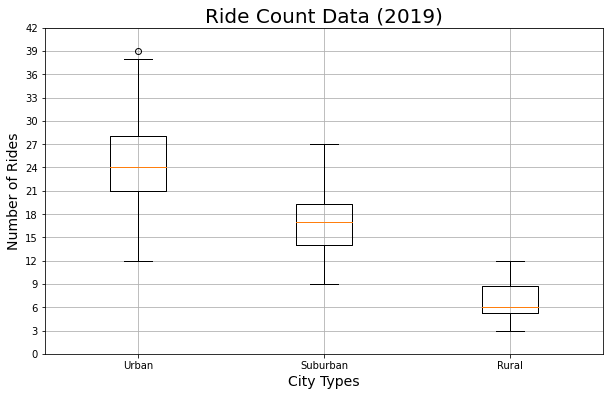

In [131]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [132]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [138]:
# Get the city that matches the outlier value of 39. This will give the most ride-count city.
urban_city_outlier = urban_ride_count[urban_ride_count.values == 39]
urban_city_outlier

city
West Angela    39
Name: ride_id, dtype: int64

In [139]:
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

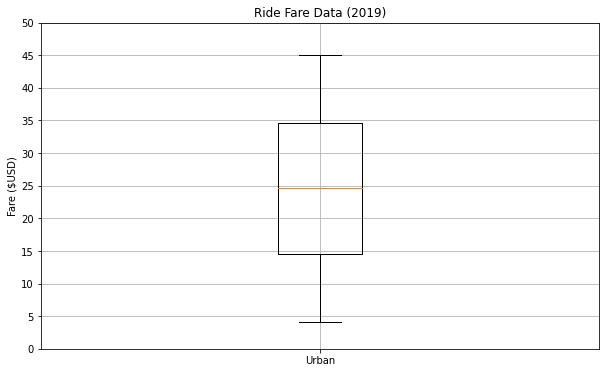

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [141]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

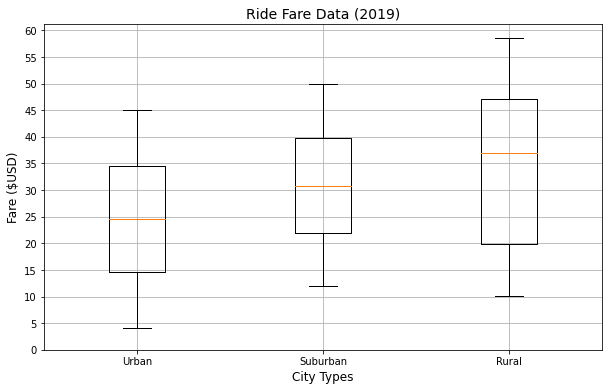

In [160]:
# Create a box-and-whisker plot for all 3 city types i.e. urban, suburban, rural fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([urban_fares, suburban_fares, rural_fares], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=14)
ax.set_ylabel('Fare ($USD)', fontsize=12)
ax.set_xlabel('City Types', fontsize=12)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [155]:
print(f"Urban Fare Avg.: {np.mean(urban_fares):.2f}, Suburban Fare Avg.: {np.mean(suburban_fares):.2f}, Rural Fare Avg.: {np.mean(rural_fares):.2f}")

Urban Fare Avg.: 24.53, Suburban Fare Avg.: 30.97, Rural Fare Avg.: 34.62


In [161]:
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

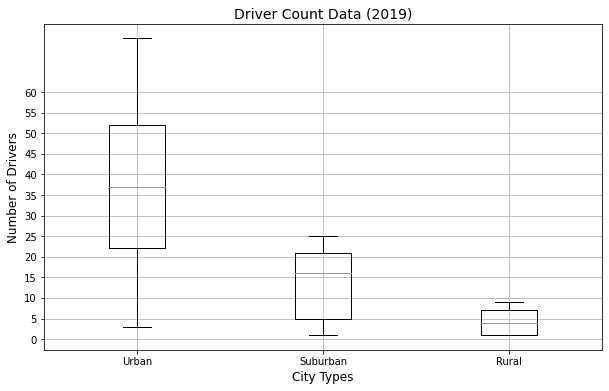

In [172]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([urban_drivers, suburban_drivers, rural_drivers], labels=x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=14)
ax.set_ylabel('Number of Drivers', fontsize=12)
ax.set_xlabel('City Types', fontsize=12)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [186]:
# Print the sum of Urban, Suburban and Rural fares.
total_urban_fare = np.sum(urban_fares)
total_suburban_fare = np.sum(suburban_fares)
total_rural_fare = np.sum(rural_fares)

print(f"Total Urban Fare = {total_urban_fare:,.2f}, Total Suburban Fare = {total_suburban_fare:,.2f}, Total Rural Fare = {total_rural_fare:,.2f}")

Total Urban Fare = 39,854.38, Total Suburban Fare = 19,356.33, Total Rural Fare = 4,327.93


In [187]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [185]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [188]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

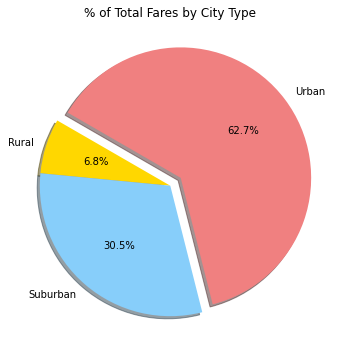

In [192]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show figure.
plt.show()

In [193]:
# Calculate the ride counts for each city type.
ride_count_types = pyber_data_df.groupby(pyber_data_df["type"]).count()["ride_id"]
ride_count_types

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [194]:
# Calculate total ride count.
total_ride_count = pyber_data_df["ride_id"].count()
total_ride_count

2375

In [195]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * ride_count_types / total_ride_count
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

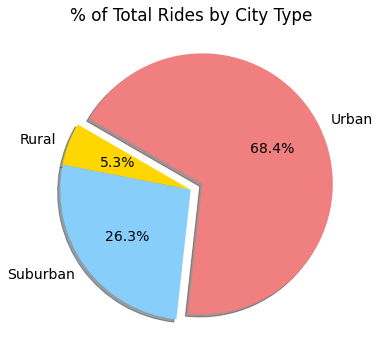

In [202]:
# Import matplotlib as mpl to change plot parameters in Pie chart.
import matplotlib as mpl
# Build percentage of ride counts for the Pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# save figure.
plt.savefig("analysis/Fig6.png")
plt.show()

In [203]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [206]:
driver_percents = 100 * (pyber_data_df.groupby(pyber_data_df["type"]).sum()['driver_count']) / (sum(pyber_data_df['driver_count']))
driver_percents


type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

In [207]:
sum(pyber_data_df['driver_count'])

68709

In [208]:
(pyber_data_df.groupby(pyber_data_df["type"]).sum()['driver_count'])

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

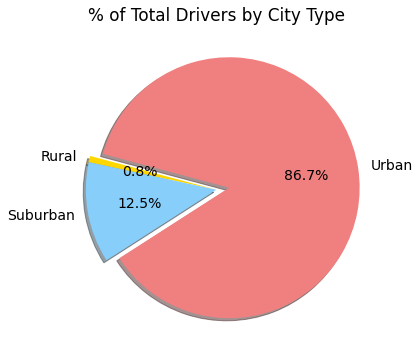

In [209]:
# Build the percentage of ddriver counts by city type in Pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()